In [1]:
"""creat a conda env. and run

!pip install
library ==version_number in the beginning"""

'creat a conda env. and run\n\n!pip install\nlibrary ==version_number in the beginning'

## Import Libraries and Check for Version

In [8]:
'''Import of Libraries -> Versions!!'''

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import Draw

import seaborn as sns

import pandas as pd

import numpy as np

import os

import matplotlib
import matplotlib.pyplot as plt


from matplotlib_venn import venn2
from matplotlib_venn import venn3

import platform

from rdkit import rdBase


In [9]:
"""
Version here used

Python Version: 3.7.11
Pandas Version: 1.3.4
Seaborn Version: 0.11.2
RDKit Version: 2020.09.1
Operating System (OS): Windows-10-10.0.19041-SP0
Mathplotlib Version: 3.5.0
Numpy Version: 1.21.2
"""

print("Python Version: " + platform.python_version())

print("Pandas Version: " + pd.__version__)
print("Seaborn Version: " + sns.__version__)

print("RDKit Version: " + rdBase.rdkitVersion )

print("Operating System (OS): " + platform.platform())

print("Mathplotlib Version: " + matplotlib.__version__)

print("Numpy Version: " + np.__version__)

Python Version: 3.7.11
Pandas Version: 1.3.4
Seaborn Version: 0.11.2
RDKit Version: 2020.09.1
Operating System (OS): Windows-10-10.0.19041-SP0
Mathplotlib Version: 3.5.0
Numpy Version: 1.21.2


## Import Data from SDFiles

In [10]:
def import_as_data_dict(path_to_data: str) -> dict:
    """
    This function returns a Dictionary with the imported File Names (Keys) as its own dictionary with 
    the first entry as 'RDMolFile' (Key) and the SDMolSupplier Objects (Value).
    
    Args:
        path_to_data (str): Path to the directory where the SDFiles are stored.
        
    Returns:
        dict{dict}: Dictionary of dictionaries for every dataset
    """ 
    all_dicts = {}
    data_dir = os.path.normpath(str(path_to_data))
    for dict_name in os.listdir(data_dir):
        singel_dict = {}
        dict_path = os.path.join(data_dir, dict_name)
        singel_dict["RDMolFile"] = Chem.SDMolSupplier(dict_path)
        all_dicts[dict_name] = singel_dict
    return all_dicts

testdict = import_as_data_dict('data')
testdict.keys()
testdict['set_chlorbenzene.sdf'].keys()

dict_keys(['RDMolFile'])

## Overview of Data Size

In [11]:
def get_number_of_molecules(all_dicts: dict) -> dict:
    """
    This function updates the dictionaries in the given dictionary with the number of molecules 
    in every dataset as new key-value pair.
    
    Args:
        all_dicts (dict): Dictionary of dictionaries with SDMolSupplier Objects (Value to 'RDMolFile' as Key).
        
    Returns:
        all_dicts (dict): Given dictionary of dictionaries updated with the Key 'number_of_molecules'.
    """
    for single_dict in all_dicts:
        number_of_molecules = len(all_dicts[single_dict]['RDMolFile'])
        all_dicts[single_dict]['number_of_molecules'] = number_of_molecules
    return all_dicts
    
len(testdict['set_chlorbenzene.sdf']['RDMolFile'])

get_number_of_molecules(testdict)
testdict['set_chlorbenzene.sdf'].keys()

dict_keys(['RDMolFile', 'number_of_molecules'])

## Get Identifier

In [14]:
'''Identifier-List for ONE Dataset'''

def get_identifier_list(
    moleculeset: Chem.SDMolSupplier, 
    id_type : str = "InChI"
    ):
    """
    This function returns a list of Chemical InChi or Smiles str for all molecules
    in a given SDMolSupplier object.

    Args:
        moleculeset (rdkit.Chem.SDMolSupplier):
        id_type (str, optional): "InChI", "InChIKey" or " "Smiles". Defaults to "InChI".

    Raises:
        ValueError: if ID_type is not "InChI," "InChIKey" or "Smiles".

    Returns:
        List[str]: List of identifiers based on given molecules.
    """
    identifier_list = []
    for mol in moleculeset:
        if id_type == "Smiles":
            identifier = Chem.MolToSmiles(mol)
        elif id_type == "InChIKey":
            identifier = Chem.MolToInchiKey(mol)
        elif id_type == "InChI":
            identifier = Chem.MolToInchi(mol)
        else:
            raise ValueError('id_type argument needs to be "Smiles", "InChIKey" or "InChI"!')
        identifier_list.append(identifier)
    return identifier_list

# get_identifier_list(testdict['set_chlorbenzene.sdf']['RDMolFile'])

In [15]:
def get_identifier_list_key(all_dicts: dict, id_type: str) -> dict:
    """
    This function returns the updated dictionaries in the given dictionary with a list of identifiers (InChI, InChIKey, 
    Smiles) as a new key-value pair using the get_identifier_list function on the RDMolFile Key-Value Pair.
    
    Args:
        all_dicts (dict): Dictionary of dictionaries with 'RDMolFile' as Key (Value is a SDMolSupplier Object).
        id_type (str): Type of Identifier ("InChI", "InChIKey" or "Smiles")
        
    Returns:
        all_dicts (dict): Given dictionary of dictionaries updated with the Key 'identifier_list'.
    """
    for single_dict in all_dicts:
        identifier_list = get_identifier_list(all_dicts[single_dict]['RDMolFile'], id_type)
        all_dicts[single_dict]['identifier_list'] = identifier_list
    return all_dicts
        
get_identifier_list_key(testdict, "InChI")
testdict['set_phenole.sdf'].keys()

dict_keys(['RDMolFile', 'number_of_molecules', 'identifier_list'])

##  Test for Duplicates

In [17]:
def get_duplicate_key(all_dicts: dict):
    """
    This function returns the updated dictionaries in the given dictionary with the number of duplicates in the 
    identifier list as new Key-Value-Pair.
    
    Args:
        all_dicts (dict): Dictionary of dictionaries with 'identifier_list' as Key.
        
    Returns:
        all_dicts (dict): Given dictionary of dictionaries updated with the Key 'number_of_duplicates'.
 
    """
    for single_dict in all_dicts:
        duplicates = len(all_dicts[single_dict]['identifier_list']) - len(set(all_dicts[single_dict]['identifier_list']))
        all_dicts[single_dict]['number_of_duplicates'] = duplicates
    return all_dicts

get_duplicate_key(testdict)
testdict['set_phenole.sdf'].keys()

dict_keys(['RDMolFile', 'number_of_molecules', 'identifier_list', 'number_of_duplicates'])

## Identifier Comparison and Visualisation

In [18]:
def get_shared_molecules_key(all_dicts: dict) -> dict:
    """
    This function returns the updated dictionaries in the given dictionary with the number of shared molecules
    and a identifier list of these molecules as two new Key-Value Pairs (number of dictionaries in the dictionary
    can be any number).
    
    Args:
        all_dicts (dict): Dictionary of dictionaries with 'identifier_list' as Key.
        
    Returns:
        all_dicts (dict): Given dictionary of dictionaries updated with the Keys 
        'number_of_'shared_molecules' and 'shared_molecules'.
    """
    sets = []
    for single_dict in all_dicts:
        single_set = set(all_dicts[single_dict]['identifier_list'])
        sets.append(single_set)  
        shared_molecules = set.intersection(*sets)
    for single_dict in all_dicts:
        all_dicts[single_dict]['number_of_shared_molecules'] = len(shared_molecules)
        all_dicts[single_dict]['shared_molecules'] = shared_molecules
    return all_dicts

get_shared_molecules_key(testdict)
testdict['set_phenole.sdf'].keys()

dict_keys(['RDMolFile', 'number_of_molecules', 'identifier_list', 'number_of_duplicates', 'number_of_shared_molecules', 'shared_molecules'])

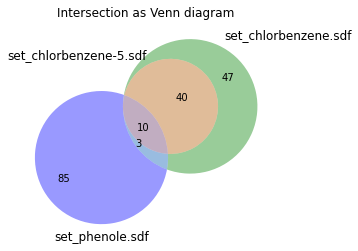

In [19]:
def visualize_intersection(all_dicts: dict):
    """
    This function returns a Venn Diagram of the identifier lists in the dicitionaries in the 
    given dictionary (as long as there are not more than three dictionaries).
    
    Args:
        all_dicts (dict): Dictionary of dictionaries with 'identifier_list' as Key.
        
    Returns:
        Venn Diagram
        
    Raises:
        WrongInputError: If there are one or more then three sets are to be compared a Error is raised.
    """
    sets = []
    for single_dict in all_dicts:
        single_set = set(all_dicts[single_dict]['identifier_list'])
        sets.append(single_set)
    if len(sets) == 3:
        v = venn3(sets, set_labels = (all_dicts.keys()))
    elif len(sets) == 2:
        v = venn2(sets, set_labels = (all_dicts.keys()))
    else:
        raise WrongInputError('Visualization only possible for two or three data sets!')
    plt.title("Intersection as Venn diagram")
    return plt.show(v)


visualize_intersection(testdict)

## Get Descriptors

In [21]:
"""Descriptor for ONE Input-List
more possible descriptors: https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors
maybe use different Descriptor Module -> rdkit.Chem.rdMolDescriptors module (has some more/different descriptors)
see: https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html
"""


def get_descriptor_list(moleculeset : Chem.SDMolSupplier, descriptor :str) -> list: 
    """
    This function returns a List of Descriptor Values for all Molecules
    in a given SDMolSupplier object.
    
    Args:
        moleculeset (rdkit.Chem.SDMolSupplier):
    
    Returns:
        List[]: List of Descriptor Values 
    """
    descriptor_list = []
    for mol in moleculeset:
        if descriptor == "MolWt":
            value = Descriptors.MolWt(mol)
        elif descriptor == "MolLogP":
            value = Descriptors.MolLogP(mol)
        elif descriptor == "NumHAcceptors":
            value = Descriptors.NumHAcceptors(mol)
        elif descriptor == "NumHDonors":
            value = Descriptors.NumHDonors(mol)
        elif descriptor == "NumHeteroatoms":
            value = Descriptors.NumHeteroatoms(mol)
        elif descriptor == "HeavyAtomCount":
            value = Descriptors.HeavyAtomCount(mol)
        elif descriptor == "RingCount":
            value = Descriptors.RingCount(mol)        
        else:
            raise ValueError ('Descriptor not found!')     
        descriptor_list.append(value)
    return descriptor_list

# get_descriptor_list(testdict['set_chlorbenzene.sdf']['RDMolFile'], 'NumHAcceptors')

In [24]:
def get_descriptor_list_key(all_dicts: dict, descriptor: str) -> dict:
    """
    This function returns the updated dictionaries in the given dictionary with a list of descriptors (MolWt,
    MolLogP, NumHDonors, NumHAcceptors, NumHeteroatoms, HeavyAtomCount, RingCount) as a new key-value pair
    using the get_descriptor_list function on the RDMolFile Key-Value Pair.
    
    Args:
        all_dicts (dict): Dictionary of dictionaries with 'RDMolFile' as Key (Value is a SDMolSupplier Object).
        id_type (str): Type of Descriptor (see above)
        
    Returns:
        all_dicts (dict): Given dictionary of dictionaries updated with the descriptor Key.
        (if function is called repeatedly with different descriptors several new Key-Value-Pairs a generated)
    """
    for single_dict in all_dicts:
        descriptor_list = get_descriptor_list(all_dicts[single_dict]['RDMolFile'], descriptor)
        all_dicts[single_dict][descriptor] = descriptor_list
    return all_dicts
        
get_descriptor_list_key(testdict, "RingCount")
testdict['set_phenole.sdf'].keys()
# get_descriptor_list_key(testdict, "MolWt")
# testdict['set_phenole.sdf']['MolWt']

dict_keys(['RDMolFile', 'number_of_molecules', 'identifier_list', 'number_of_duplicates', 'number_of_shared_molecules', 'shared_molecules', 'RingCount', 'MolWt'])

## Lipinski Rule of 5 and visualisation
- MolWt <= 500
- MolLogP <= 5
- NumHAcceptor <= 10
- NumHDonor <= 5

In [27]:
def test_for_lipinski(moleculeset: Chem.SDMolSupplier) -> list:
    """
    This function returns a list with the number of Lipinski Rules broken for every molecule in the given
    moleculeset.
    
    Args:
        moleculeset (Chem.SDMolSupplier): SDMolSupplier Objects 
        
    Returns:
        list[int]: List of number of broken Rules.
    """
    num_of_break = []
    for mol in moleculeset:
        rule_break = 0
        if Descriptors.MolLogP(mol) > 5:
            rule_break +=1
        if Descriptors.MolWt(mol) > 500:
            rule_break +=1
        if Descriptors.NumHAcceptors(mol) > 10:
            rule_break +=1
        if Descriptors.NumHDonors(mol) > 5:
            rule_break +=1
        else:
            rule_break += 0
        num_of_break.append(rule_break)
    return num_of_break

In [34]:
def get_lipinski_key (all_dicts : dict) -> dict : #Dictionary
    """
    This function returns the updated dictionaries in the given dictionary with the list of the number of broken
    Lipinski Rules (Key 'lipinski_break_list') using the test_for_lipinski function and a summary for the broken 
    rules (Key 'lipinski_summary').
    
    Args:
        all_dicts (dict): Dictionary of dictionaries with 'RDMolFile' as Key (Value is a SDMolSupplier Object).
        
    Returns:
        all_dicts (dict): Given dictionary of dictionaries updated with the Lipinski Keys.
    """
    for single_dict in all_dicts:
        lipinski_break_list = test_for_lipinski(all_dicts[single_dict]['RDMolFile'])
        all_dicts[single_dict]['lipinski_break_list'] = lipinski_break_list
        lipinski_summary = {"lipinski_molecules" : lipinski_break_list.count(0),
                            "1_rule_broken" : lipinski_break_list.count(1),
                            "2_rules_broken" : lipinski_break_list.count(2),
                            "3_rules_broken" : lipinski_break_list.count(3), 
                            "4_rules_broken" : lipinski_break_list.count(4)}
        all_dicts[single_dict]['lipinski_summary'] = lipinski_summary
    return all_dicts

get_lipinski_key(testdict)
testdict['set_phenole.sdf']['lipinski_summary']
testdict['set_chlorbenzene.sdf']['lipinski_summary']
testdict['set_chlorbenzene.sdf']['lipinski_summary'].values()
testdict['set_phenole.sdf'].keys()

dict_keys(['RDMolFile', 'number_of_molecules', 'identifier_list', 'number_of_duplicates', 'number_of_shared_molecules', 'shared_molecules', 'RingCount', 'MolWt', 'lipinski_break_list', 'lipinski_summary', 'binned_MolWt'])

,Number of broken rules,set_chlorbenzene-5.sdf,set_chlorbenzene.sdf,set_phenole.sdf
0,0,50,100,100
1,1,0,0,0
2,2,0,0,0
3,3,0,0,0
4,4,0,0,0


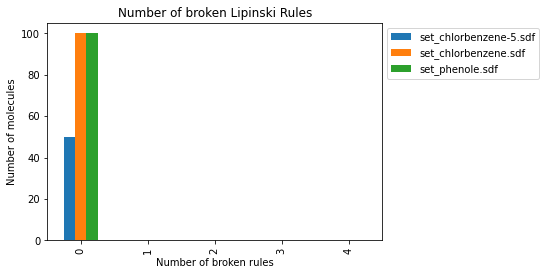

In [32]:
def lipinski_plot(all_dicts : dict):
    """
    This function returns a Pandas DataFrame Object and the corresponding Bar-Plot for the number of
    molecules in every Dataset breaking 0 to 4 Lipinski Rules using the 'lipinski_summary' key in the
    given dictionaries.
    
    args:
        all_dicts (dict): Dictionary of dictionaries with 'lipinski_summary' as Key (value is a dictionary).
        
    returns:
        pd.DataFrame: 'lipinski_summary' as a Pandas Dataframe Object
        Bar-Plot
    """
    lipinski_df_dict = {"Number of broken rules": [0,1,2,3,4]}
    for single_dict in all_dicts:
        header = single_dict
        lipinski_df_dict.update({header : list(all_dicts[single_dict]['lipinski_summary'].values())})
    lipinski_df = pd.DataFrame(lipinski_df_dict)
    lipinski_df.plot(x = "Number of broken rules",
                     kind='bar',
                     stacked=False,
                     title='Number of broken Lipinski Rules',
                     ylabel ='Number of molecules',)
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    return lipinski_df

lipinski_plot(testdict)

## Binning and Visualisation for Moleculare Weight

In [35]:
def get_bins_with_counts_4(all_dicts: dict, width_of_bins: int) -> dict:
    """
    This function returns the updated dictionaries in the given dictionary with the Key 'binned_MolWt', using
    the same bins for every dataset spanning form lowest to the highest Molecular Weight and a chosen width 
    for the bins.
    
    Args:
        all_dicts (dict): Dictionary of dictionaries including the Key 'MolWt'.
        widht_of_bins (int): Interval size for the bins
        
    Returns:
        all_dicts (dict): Given dictionary of dictionaries updated with the 'binned_MolWt' Key.
    """
    find_min = []
    find_max = []
    for single_dict in all_dicts:
        find_min.append(min(all_dicts[single_dict]['MolWt']))
        find_max.append(max(all_dicts[single_dict]['MolWt']))
    if min(find_min) < round(min(find_min), ndigits=-1):
        lower = round(min(find_min), ndigits=-1) - 10
    else:
        lower = round(min(find_min), ndigits=-1)
    if max(find_max) > round(max(find_max), ndigits=-1):
        upper = round(max(find_max), ndigits=-1) +10
    else:
        upper = round(max(find_max), ndigits=-1)
    if (upper-lower)%width_of_bins == 0:
        bins = pd.interval_range(start=lower, end=upper, freq = width_of_bins)
    else:
        to_add = width_of_bins - (upper-lower)%width_of_bins
        bins = pd.interval_range(start=lower, end=(upper + to_add), freq = width_of_bins)    
    for single_dict in all_dicts:
        counts = pd.value_counts(pd.cut(all_dicts[single_dict]['MolWt'], bins), sort=False)
        all_dicts[single_dict]['binned_MolWt'] = counts     
    return all_dicts

    
get_bins_with_counts_4(testdict, 15)

list((testdict['set_phenole.sdf']['binned_MolWt']))
testdict['set_phenole.sdf'].keys()


dict_keys(['RDMolFile', 'number_of_molecules', 'identifier_list', 'number_of_duplicates', 'number_of_shared_molecules', 'shared_molecules', 'RingCount', 'MolWt', 'lipinski_break_list', 'lipinski_summary', 'binned_MolWt'])

,Molecular Weight Intervalls,set_chlorbenzene-5.sdf,set_chlorbenzene.sdf,set_phenole.sdf
0,"(90.0, 105.0]",0,0,1
1,"(105.0, 120.0]",1,1,12
2,"(120.0, 135.0]",6,6,26
3,"(135.0, 150.0]",15,24,21
4,"(150.0, 165.0]",15,26,21
5,"(165.0, 180.0]",6,22,10
6,"(180.0, 195.0]",4,9,6
7,"(195.0, 210.0]",3,7,1
8,"(210.0, 225.0]",0,3,1
9,"(225.0, 240.0]",0,0,0


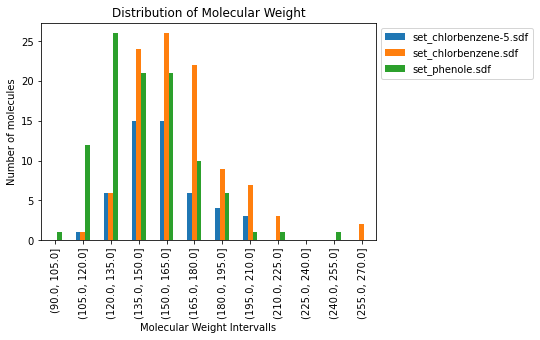

In [37]:
def MolWt_plot(all_dicts: dict):
    first_dict = list(all_dicts.keys())[0]
    MolWt_df_dict = {"Molecular Weight Intervalls": all_dicts[first_dict]['binned_MolWt'].keys()}
    for single_dict in all_dicts:
        header = single_dict
        MolWt_df_dict.update({header : list(testdict[single_dict]['binned_MolWt'])})
    MolWt_df = pd.DataFrame(MolWt_df_dict)
    MolWt_df.plot(x = "Molecular Weight Intervalls",
                 kind = 'bar',
                 stacked=False,
                 title='Distribution of Molecular Weight',
                 ylabel ='Number of molecules')
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    return MolWt_df


MolWt_plot(testdict)

## Chemical Space Visulisation

## Visualisation for other Descriptors